In [35]:
from google.colab import drive
import zipfile
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image



In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!ls '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/horse-or-human.zip'

'/content/drive/My Drive/AI/Tensorflow/horse_or_humans/horse-or-human.zip'


In [16]:
# Preparing the data which is originally separated in two directories
training_zipped = '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/horse-or-human.zip'
zip_ref = zipfile.ZipFile(training_zipped,'r')
zip_ref.extractall('/content/drive/My Drive/AI/Tensorflow/horse_or_humans')
zip_ref.close()


In [22]:
!ls '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/horses' | head -n 10
!ls '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/humans' | head -n 10

horse01-0.png
horse01-1.png
horse01-2.png
horse01-3.png
horse01-4.png
horse01-5.png
horse01-6.png
horse01-7.png
horse01-8.png
horse01-9.png
human01-00.png
human01-01.png
human01-02.png
human01-03.png
human01-04.png
human01-05.png
human01-06.png
human01-07.png
human01-08.png
human01-09.png


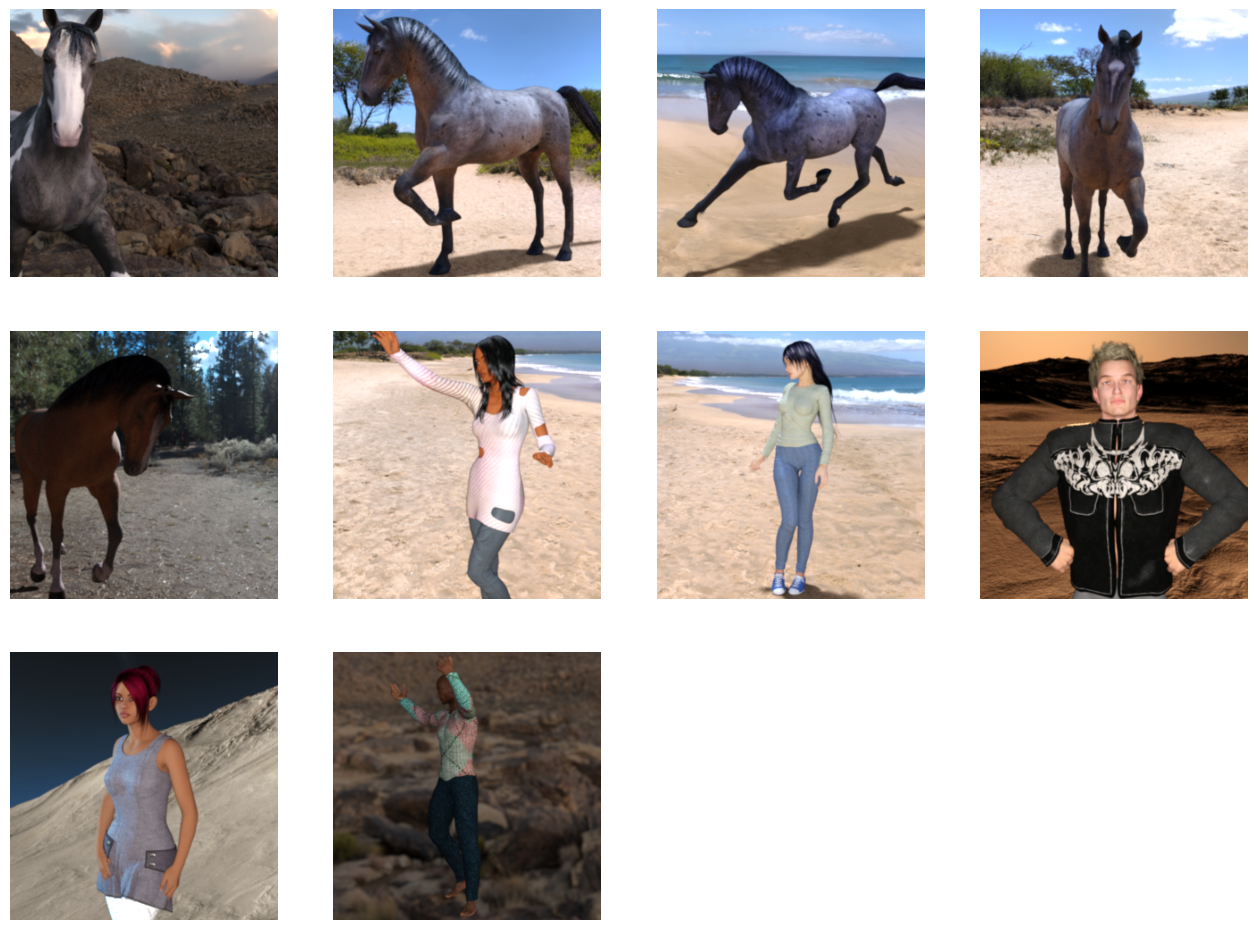

In [25]:
# Directories for horse and human images
horse_dir = '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/horses'
human_dir = '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/humans'
train_dir = '/content/drive/My Drive/AI/Tensorflow/horse_or_humans'

# List of all image file names in each directory
horse_images = os.listdir(horse_dir)
human_images = os.listdir(human_dir)

# Randomly pick 5 images from each directory
selected_horse_images = random.sample(horse_images, 5)
selected_human_images = random.sample(human_images, 5)

# Combine the selected images into one list
selected_images = [os.path.join(horse_dir, img) for img in selected_horse_images] + \
                  [os.path.join(human_dir, img) for img in selected_human_images]

# Set up the figure and axes
fig = plt.gcf()
fig.set_size_inches(16, 16)

# Display the images in a 4x4 grid
for i, img_path in enumerate(selected_images):
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('off')  # Turn off the axis
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [24]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')

])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,520,993 (24.88 MB)

 Trainable params: 6,520,993 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# This cell is mainly for preparing the dataset in 3 steps 1. loading them 2. rescaling 3. cashing

# Step 1
train_dataset = tf.keras.utils.image_dataset_from_directory(

          train_dir,
          image_size=(300,300),
          batch_size=128,
          label_mode='binary'




)


# Step 2
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

train_dataset_rescaled = train_dataset.map(lambda image, label: (rescale_layer(image),label))



# Step 3
train_dataset_final = (train_dataset_rescaled.cache().prefetch(buffer_size=tf.data.AUTOTUNE))







Found 1027 files belonging to 2 classes.


In [31]:
# In this cell doing the same for the validation dataset

# Preparing the data which is originally separated in two directories
training_zipped = '/content/drive/My Drive/AI/Tensorflow/horse_or_humans/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(training_zipped,'r')
zip_ref.extractall('/content/drive/My Drive/AI/Tensorflow/validation')
zip_ref.close()


validation_dir = '/content/drive/My Drive/AI/Tensorflow/validation'


# Step 1
validation_dataset = tf.keras.utils.image_dataset_from_directory(

          validation_dir,
          image_size=(300,300),
          batch_size=128,
          label_mode='binary'




)


# Step 2


validation_dataset_rescaled = validation_dataset.map(lambda image, label: (rescale_layer(image),label))



# Step 3
validation_dataset_final = (validation_dataset_rescaled.cache().prefetch(buffer_size=tf.data.AUTOTUNE))









Found 256 files belonging to 2 classes.


In [34]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


history = model.fit(train_dataset_final,
                    validation_data=validation_dataset_final,


                    steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 132s 15s/step - accuracy: 0.5234 - loss: 0.7994 - val_accuracy: 0.8945 - val_loss: 0.6865
Epoch 2/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 1.0000 - loss: 0.6765

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.6765 - val_accuracy: 0.5000 - val_loss: 0.8803
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 127s 15s/step - accuracy: 0.4952 - loss: 0.7628 - val_accuracy: 0.5000 - val_loss: 0.6969
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3333 - loss: 0.7167 - val_accuracy: 0.5000 - val_loss: 0.6848
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 124s 14s/step - accuracy: 0.6750 - loss: 0.6560 - val_accuracy: 0.5000 - val_loss: 0.8025
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3333 - loss: 0.7528 - val_accuracy: 0.5000 - val_loss: 1.0143
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 114s 15s/step - accuracy: 0.6322 - loss: 0.6507 - val_accuracy: 0.5000 - val_loss: 1.5676
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6667 - loss: 0.6064 - val_accuracy: 0.5273 - val_loss: 1.4168
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 132s 14s/step - accuracy: 0.7917 - loss: 0.4450 - val_accuracy: 0.7305 - val_loss: 0.9134
Epoch 10/15


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
The image is a horse


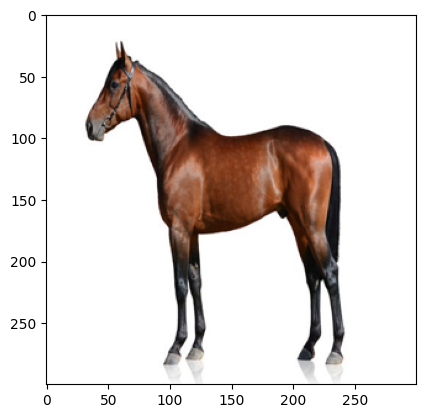

In [38]:

# Provide the path to the image file
path = 'horse.png'  # Replace with your image file path

# Load and preprocess the image using PIL
img = Image.open(path)
img = img.resize((300, 300))  # Resize according to your model input
x = np.array(img)
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = x / 255.0  # Normalize if required by your model

# Predict using your model (assuming the model is already defined and compiled)
predictions = model.predict(x, batch_size=1)
plt.imshow(img)

# Interpret the prediction
if predictions[0] > 0.5:
    print('The image is a human')
else:
    print('The image is a horse')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The image is a human


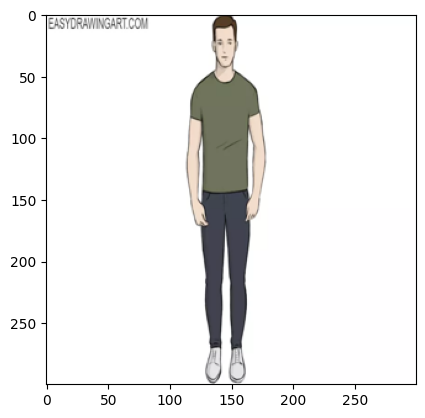

In [42]:
# Provide the path to the image file
path = 'human.png'  # Replace with your image file path

# Load and preprocess the image using PIL
img = Image.open(path)
img = img.resize((300, 300))  # Resize according to your model input
x = np.array(img)
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = x / 255.0  # Normalize if required by your model

# Predict using your model (assuming the model is already defined and compiled)
predictions = model.predict(x, batch_size=1)
plt.imshow(img)

# Interpret the prediction
if predictions[0] > 0.5:
    print('The image is a human')
else:
    print('The image is a horse')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
The image is a human


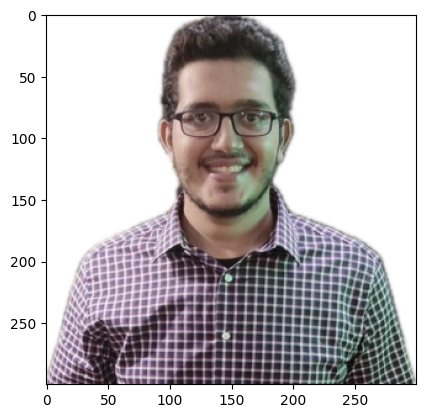

In [44]:
# Provide the path to the image file
path = 'sedra.jpg'  # Replace with your image file path

# Load and preprocess the image using PIL
img = Image.open(path)
img = img.resize((300, 300))  # Resize according to your model input
x = np.array(img)
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = x / 255.0  # Normalize if required by your model

# Predict using your model (assuming the model is already defined and compiled)
predictions = model.predict(x, batch_size=1)
plt.imshow(img)

# Interpret the prediction
if predictions[0] > 0.5:
    print('The image is a human')
else:
    print('The image is a horse')